<a href="https://colab.research.google.com/github/hitcaff/Topic_Modeling_on_news_articles/blob/main/Topic_Modeling_on_News_Articles(Unsupervised)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic Modeling on News Articles(BBC)



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/hitcaff/Topic_Modeling_on_news_articles

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries



import os                                                    # importing os module
import numpy as np                                           # Importing data manipulation libraries
import pandas as pd
import matplotlib.pyplot as plt                              # importing data visualization modules
import seaborn as sns
import matplotlib.mlab as mlab                               # importing mlab for implementing MATLAB functions
import scipy.stats as stats
import ast                                                   # import ast(abstract syntax tree)
import nltk                                                  # importing Natural Language Toolkit and other NLP modules

from IPython.display import display                          # importing tqdm and display modules for progress meters/bars
from sklearn.feature_extraction.text import CountVectorizer  # importing CountVectorizer for feature extraction
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from collections import Counter
from wordcloud import WordCloud                              # importing wordcloud to represent topics wordcloud

from sklearn.manifold import TSNE                            # importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.decomposition import TruncatedSVD               # importing decomposition modules
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer  # importing countVectorizer for text vectorization

import warnings                                               # Importing warnings library
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
!wget -nc https://mydatt.s3.eu-north-1.amazonaws.com/bbc-20250702T073522Z-1-001.zip

--2025-07-23 14:31:28--  https://mydatt.s3.eu-north-1.amazonaws.com/bbc-20250702T073522Z-1-001.zip
Resolving mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)... 3.5.217.55, 3.5.216.54
Connecting to mydatt.s3.eu-north-1.amazonaws.com (mydatt.s3.eu-north-1.amazonaws.com)|3.5.217.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3120100 (3.0M) [application/zip]
Saving to: ‘bbc-20250702T073522Z-1-001.zip’

bbc-20250702T073522 100%[===================>]   2.97M  3.38MB/s    in 0.9s    

2025-07-23 14:31:29 (3.38 MB/s) - ‘bbc-20250702T073522Z-1-001.zip’ saved [3120100/3120100]



In [ ]:
!unzip -o bbc-20250702T073522Z-1-001.zip

Archive:  bbc-20250702T073522Z-1-001.zip
  inflating: bbc/README.TXT          
  inflating: bbc/tech/385.txt        
  inflating: bbc/tech/381.txt        
  inflating: bbc/tech/384.txt        
  inflating: bbc/tech/396.txt        
  inflating: bbc/tech/368.txt        
  inflating: bbc/tech/388.txt        
  inflating: bbc/tech/366.txt        
  inflating: bbc/tech/362.txt        
  inflating: bbc/tech/395.txt        
  inflating: bbc/tech/386.txt        
  inflating: bbc/tech/371.txt        
  inflating: bbc/tech/380.txt        
  inflating: bbc/tech/373.txt        
  inflating: bbc/tech/364.txt        
  inflating: bbc/tech/399.txt        
  inflating: bbc/tech/387.txt        
  inflating: bbc/tech/369.txt        
  inflating: bbc/tech/390.txt        
  inflating: bbc/tech/379.txt        
  inflating: bbc/tech/374.txt        
  inflating: bbc/tech/378.txt        
  inflating: bbc/tech/391.txt        
  inflating: bbc/tech/367.txt        
  inflating: bbc/tech/383.txt        
  inflati

### Dataset First View

In [ ]:
bbc_folder = '/content/bbc'

In [ ]:
bbc_sub_f = ['business', 'entertainment', 'politics', 'sport', 'tech']

texts = []
labels = []

for bbc_sub in bbc_sub_f:
  filepath = os.path.join(bbc_folder, bbc_sub)

    # Check if the folder exists
  if os.path.exists(filepath): # to check category folder path
        # Loop through each text file in the category folder
        for file_name in os.listdir(filepath):
            if file_name.endswith('.txt'):
                file_path = os.path.join(filepath, file_name) # to use category folder path
                try:
                    # Read the content of the text file
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                        text = file.read().strip()
                        texts.append(text)
                        labels.append(bbc_sub) # Appending the specific category label
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
  else:
        print(f"Folder {filepath} not found") # to print the specific category folder path

In [ ]:
bbc_df = pd.DataFrame({
    'text': texts,
    'category': labels
})

print("BBC Dataset DataFrame:")
print(bbc_df)

BBC Dataset DataFrame:
                                                   text  category
0     Pension hitch for long-living men\n\nMale life...  business
1     Peugeot deal boosts Mitsubishi\n\nStruggling J...  business
2     China continues rapid growth\n\nChina's econom...  business
3     The 'ticking budget' facing the US\n\nThe budg...  business
4     Liberian economy starts to grow\n\nThe Liberia...  business
...                                                 ...       ...
2220  Microsoft launches its own search\n\nMicrosoft...      tech
2221  Microsoft gets the blogging bug\n\nSoftware gi...      tech
2222  Broadband in the UK growing fast\n\nHigh-speed...      tech
2223  Putting a face to 'Big Brother'\n\nLiterally p...      tech
2224  Microsoft plans 'safer ID' system\n\nMicrosoft...      tech

[2225 rows x 2 columns]


In [ ]:
bbc_df.head()

,text,category
0,Pension hitch for long-living men\n\nMale life...,business
1,Peugeot deal boosts Mitsubishi\n\nStruggling J...,business
2,China continues rapid growth\n\nChina's econom...,business
3,The 'ticking budget' facing the US\n\nThe budg...,business
4,Liberian economy starts to grow\n\nThe Liberia...,business


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bbc_df.shape

(2225, 2)

### Dataset Information

In [ ]:
# Dataset Info
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2225 non-null   object
 1   category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bbc_df.duplicated().sum()

np.int64(98)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bbc_df.isnull().sum()

,0
text,0
category,0


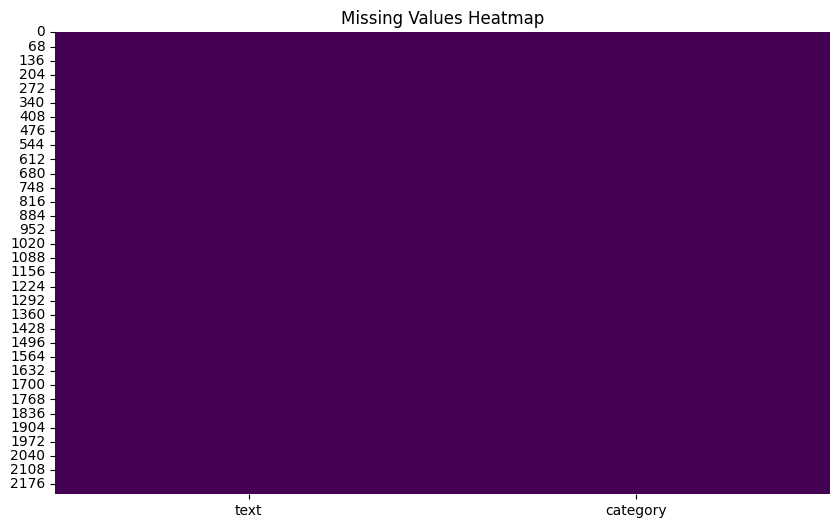

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(bbc_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bbc_df.columns

Index(['text', 'category'], dtype='object')

In [ ]:
# Dataset Describe
bbc_df.describe()

,text,category
count,2225,2225
unique,2127,5
top,Bookmakers back Aviator for Oscar\n\nThe Aviat...,sport
freq,2,511


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bbc_df.nunique()

,0
text,2127
category,5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Handling Duplicate Values
bbc_df.drop_duplicates(inplace=True)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

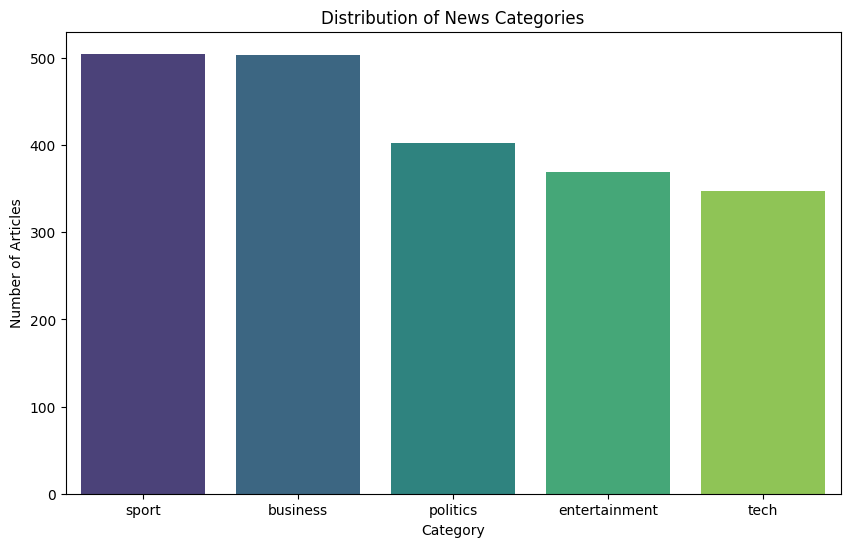

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=bbc_df, order = bbc_df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

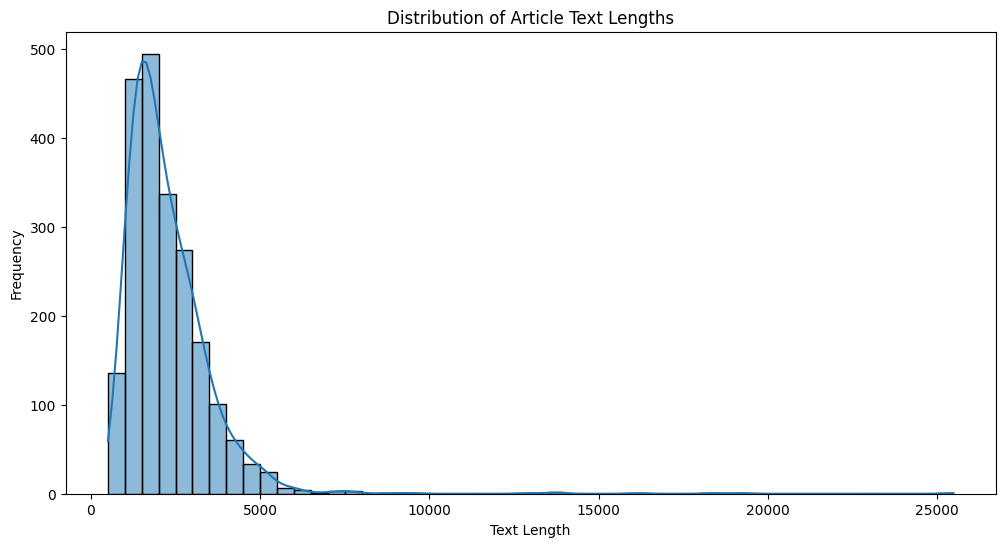

In [ ]:
# Chart - 2 visualization code
bbc_df['text_length'] = bbc_df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(bbc_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

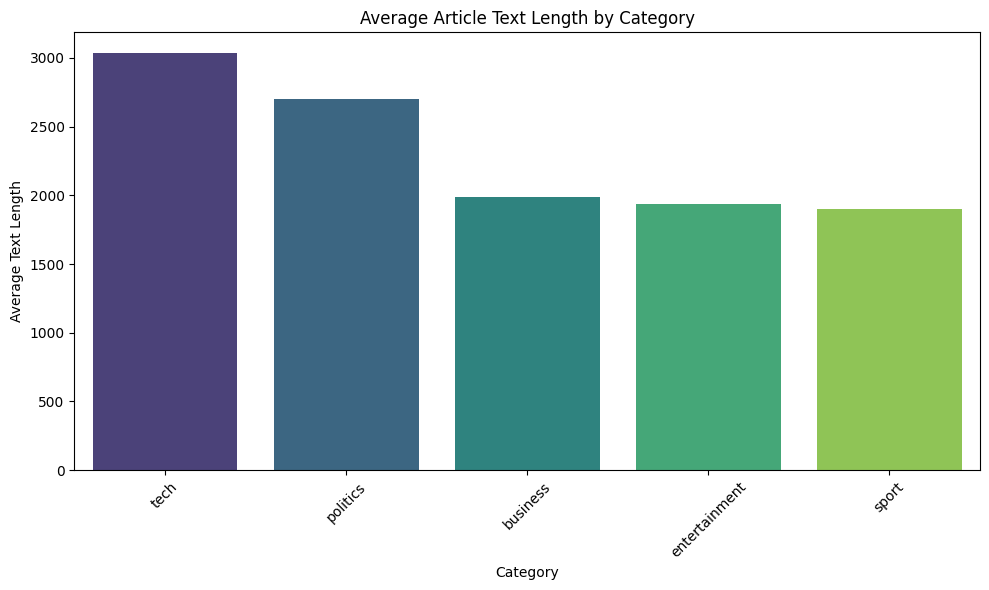

In [ ]:
# Chart - 3 visualization code
avg_text_length_by_category = bbc_df.groupby('category')['text_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_text_length_by_category.index, y=avg_text_length_by_category.values, palette='viridis')
plt.title('Average Article Text Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

NLTK stopwords not found. Downloading...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


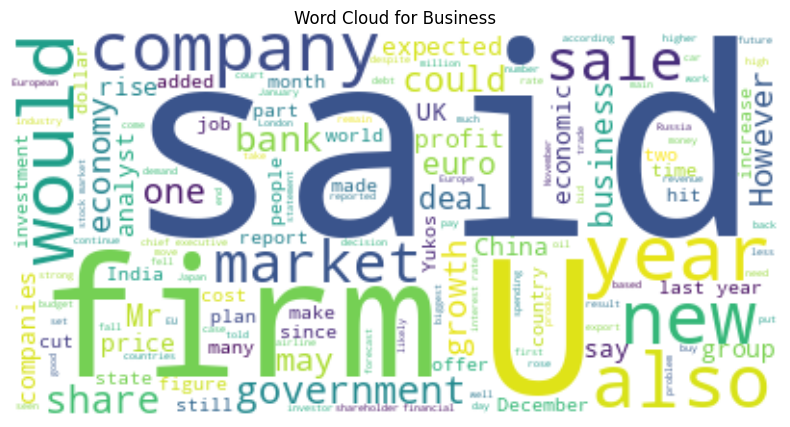

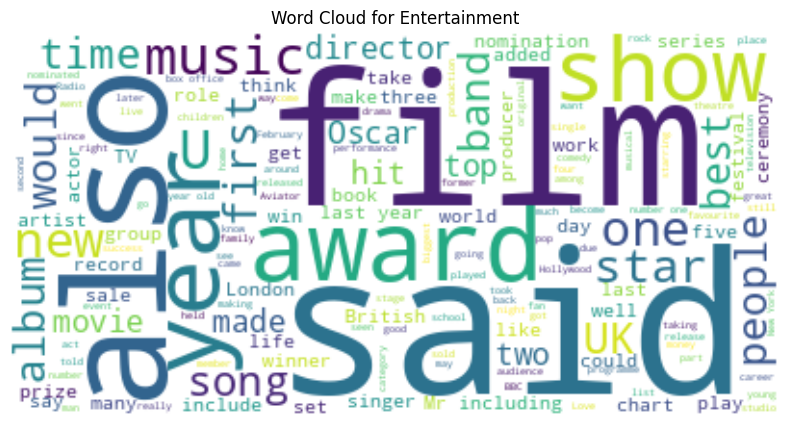

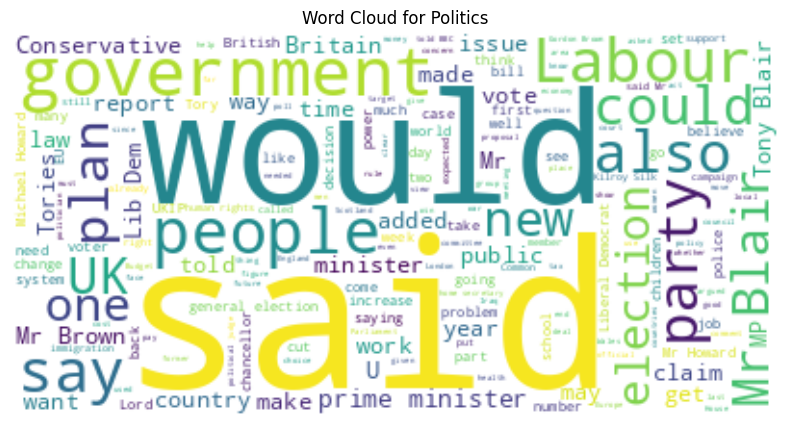

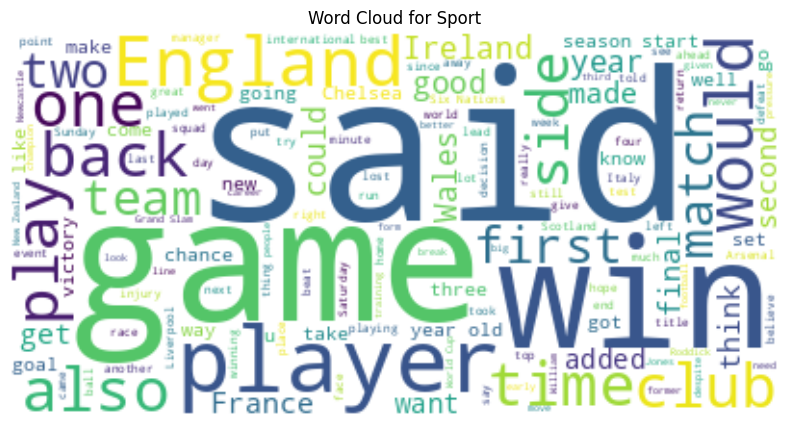

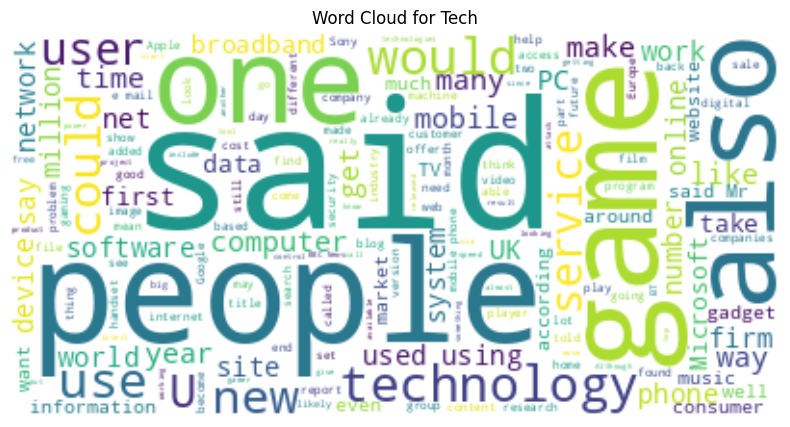

In [ ]:
# Chart - 4 visualization code

from collections import Counter
from wordcloud import WordCloud

# Function to generate word cloud for each category
def generate_wordcloud(category, dataframe):
    text = " ".join(review for review in dataframe[dataframe['category'] == category]['text'])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {category.capitalize()}')
    plt.show()

try:
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))
except LookupError:
  print("NLTK stopwords not found. Downloading...")
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  STOPWORDS = set(stopwords.words('english'))


for category in bbc_df['category'].unique():
    generate_wordcloud(category, bbc_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

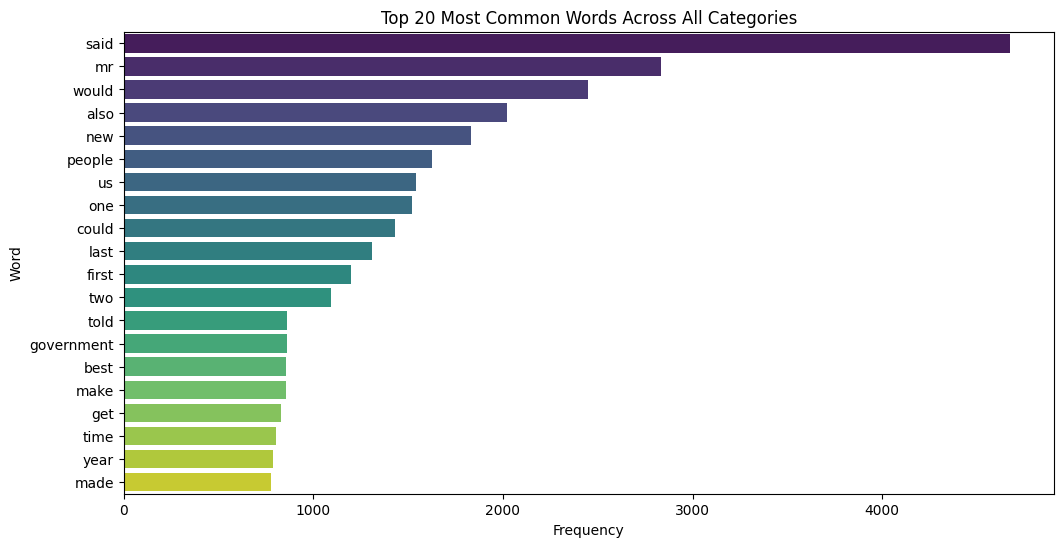

In [ ]:
# Chart - 5 visualization code

from collections import Counter

# Combine all text data
all_text = " ".join(text for text in bbc_df['text'])

# Tokenize the text and remove stopwords and non-alphabetic tokens
words = [word for word in all_text.lower().split() if word.isalpha() and word not in STOPWORDS]

# Get the most common words
most_common_words = Counter(words).most_common(20) # Get top 20 words

# Create a DataFrame for visualization
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Visualize the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=most_common_df, palette='viridis')
plt.title('Top 20 Most Common Words Across All Categories')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

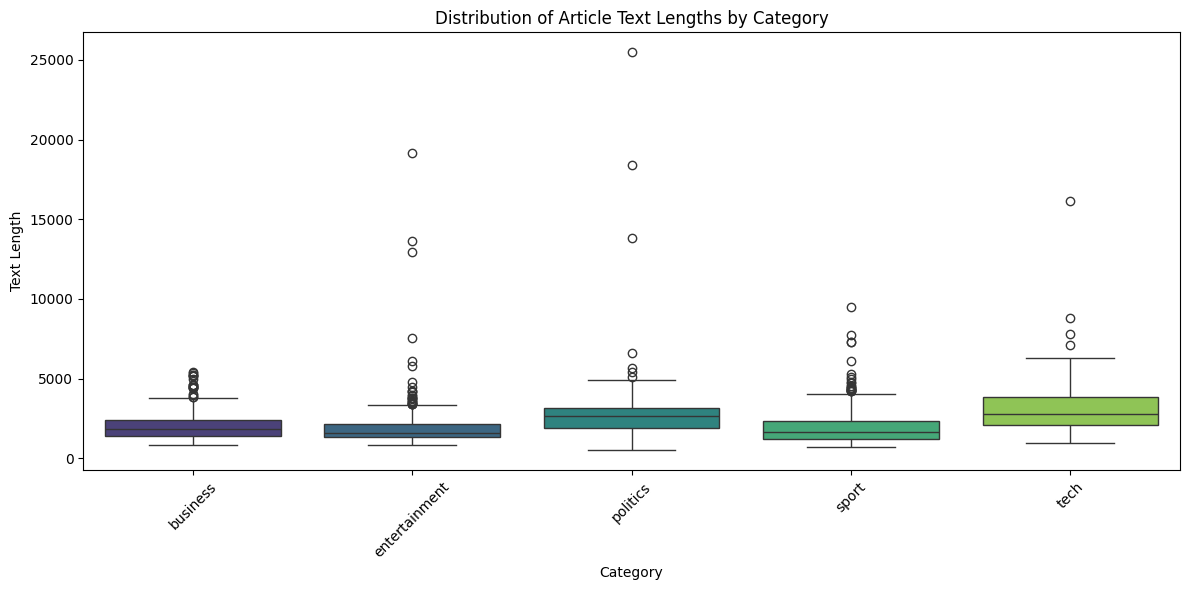

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='text_length', data=bbc_df, palette='viridis')
plt.title('Distribution of Article Text Lengths by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

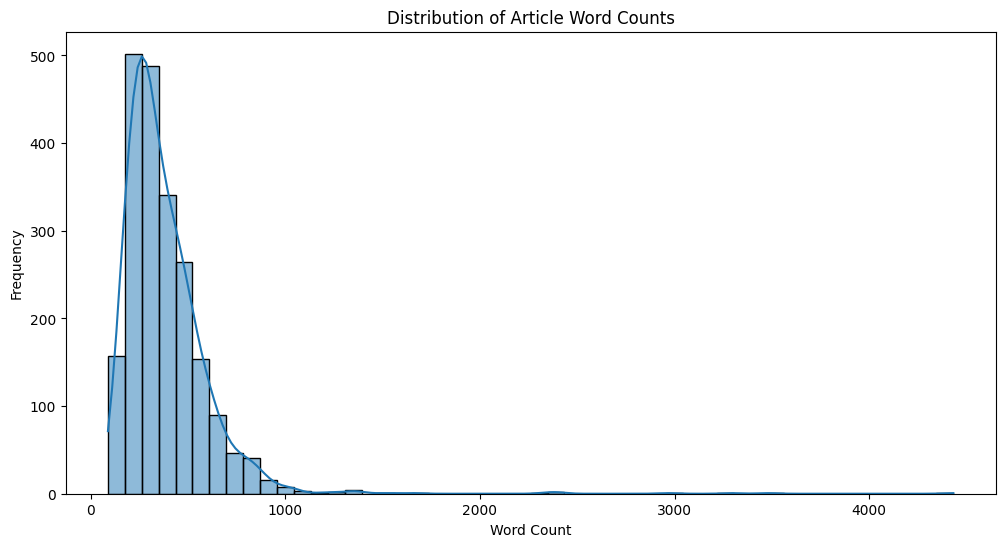

In [ ]:
# Chart - 7 visualization code
bbc_df['word_count'] = bbc_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(bbc_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Article Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

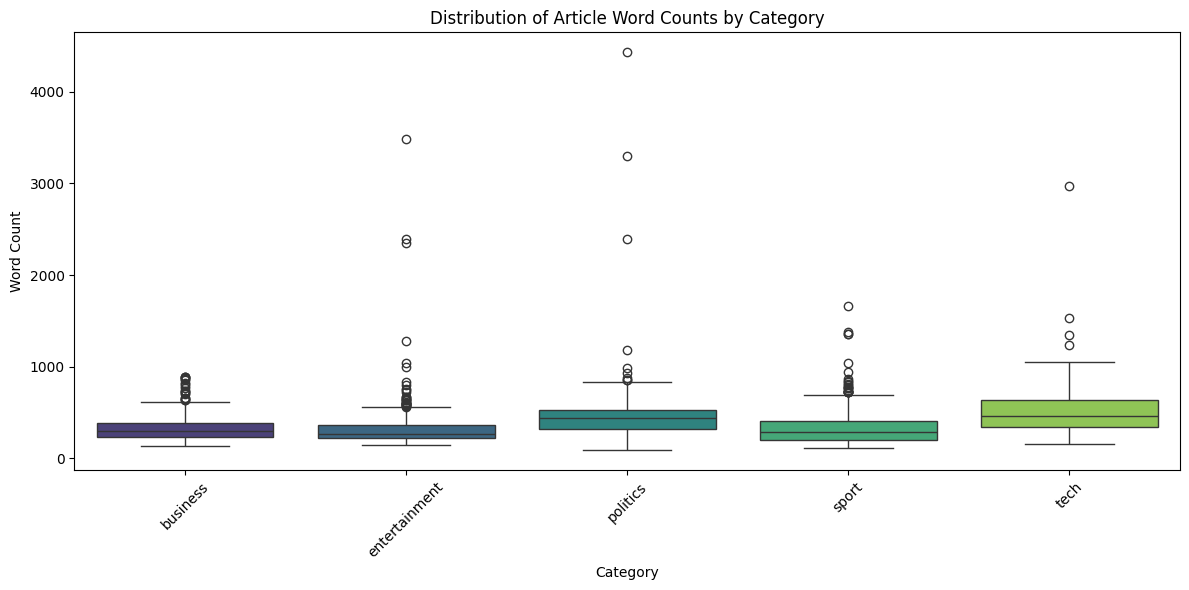

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='word_count', data=bbc_df, palette='viridis')
plt.title('Distribution of Article Word Counts by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

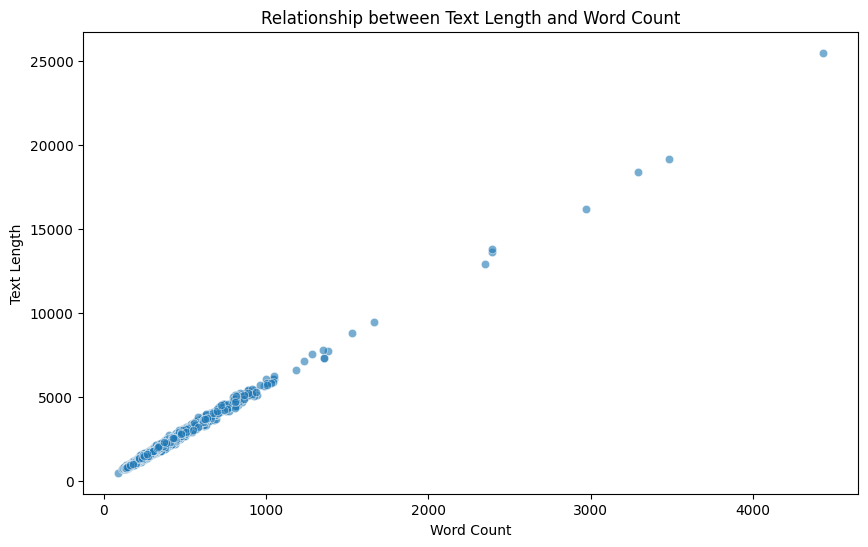

In [ ]:
# Chart - 9 visualization code

# Create a scatter plot to visualize the relationship between text length and word count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='text_length', data=bbc_df, alpha=0.6)
plt.title('Relationship between Text Length and Word Count') # Add title
plt.xlabel('Word Count') # Add x-axis label
plt.ylabel('Text Length') # Add y-axis label
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

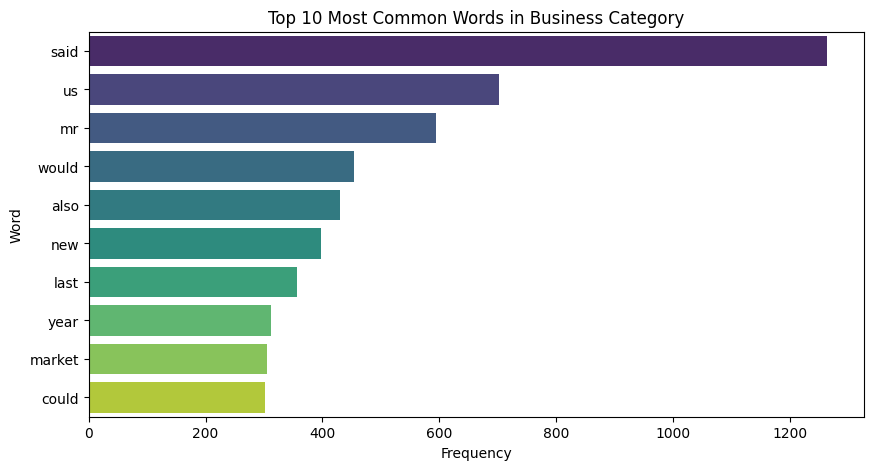

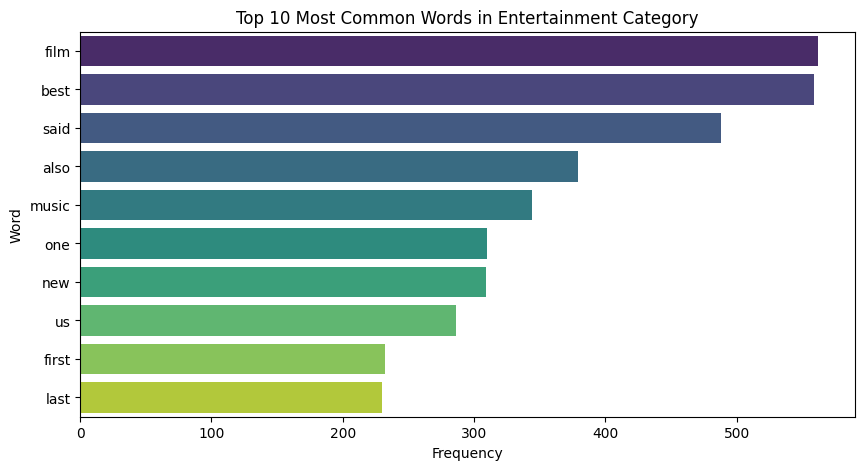

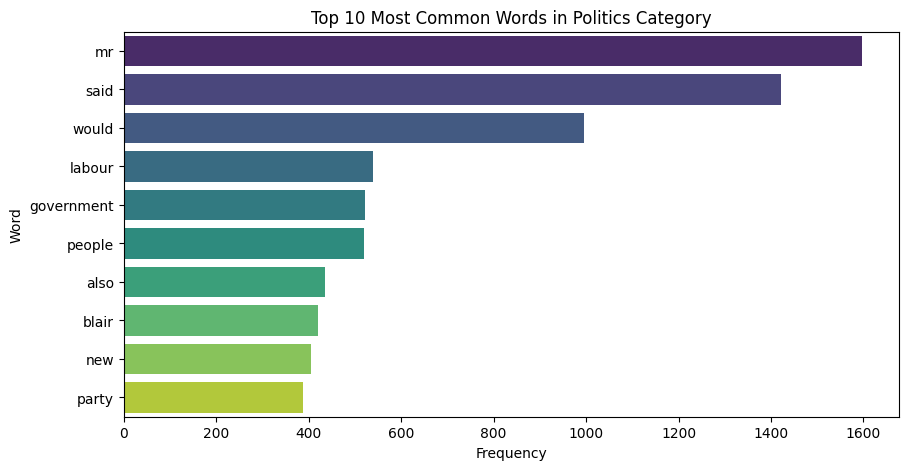

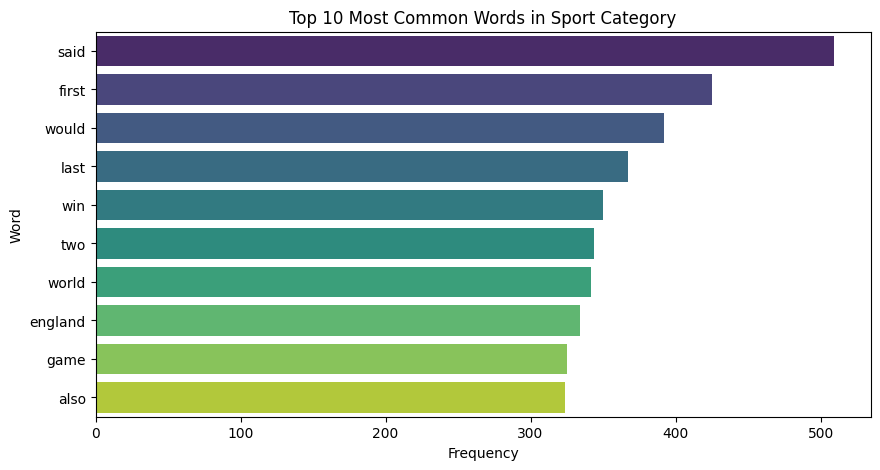

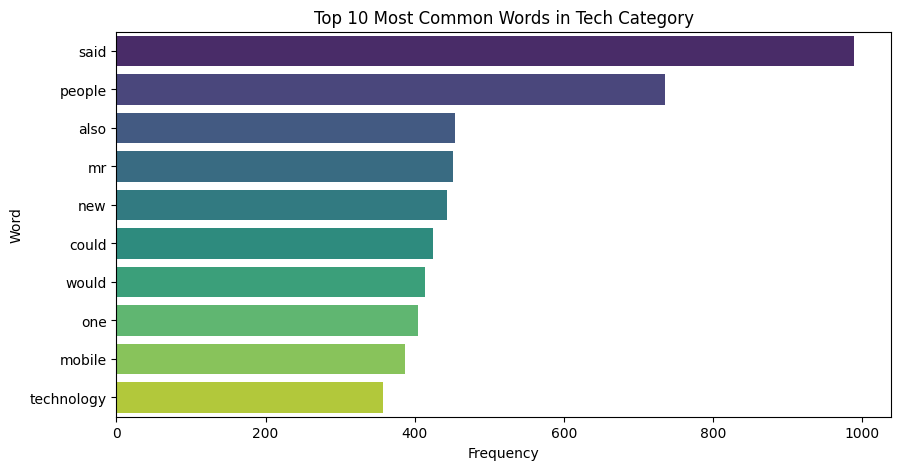

In [ ]:
# Chart - 10 visualization code

# Function to get most common words for a category
def get_most_common_words_by_category(category, dataframe, n=10):
    # Filter dataframe by category
    category_text = " ".join(dataframe[dataframe['category'] == category]['text'])

    # Tokenize, remove non-alphabetic words and stopwords
    words = [word for word in category_text.lower().split() if word.isalpha() and word not in STOPWORDS]

    # Get the most common words
    most_common_words = Counter(words).most_common(n)
    return most_common_words

# Get and display most common words for each category
for category in bbc_df['category'].unique():
    most_common = get_most_common_words_by_category(category, bbc_df)
    most_common_df = pd.DataFrame(most_common, columns=['word', 'count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='word', data=most_common_df, palette='viridis')
    plt.title(f'Top 10 Most Common Words in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

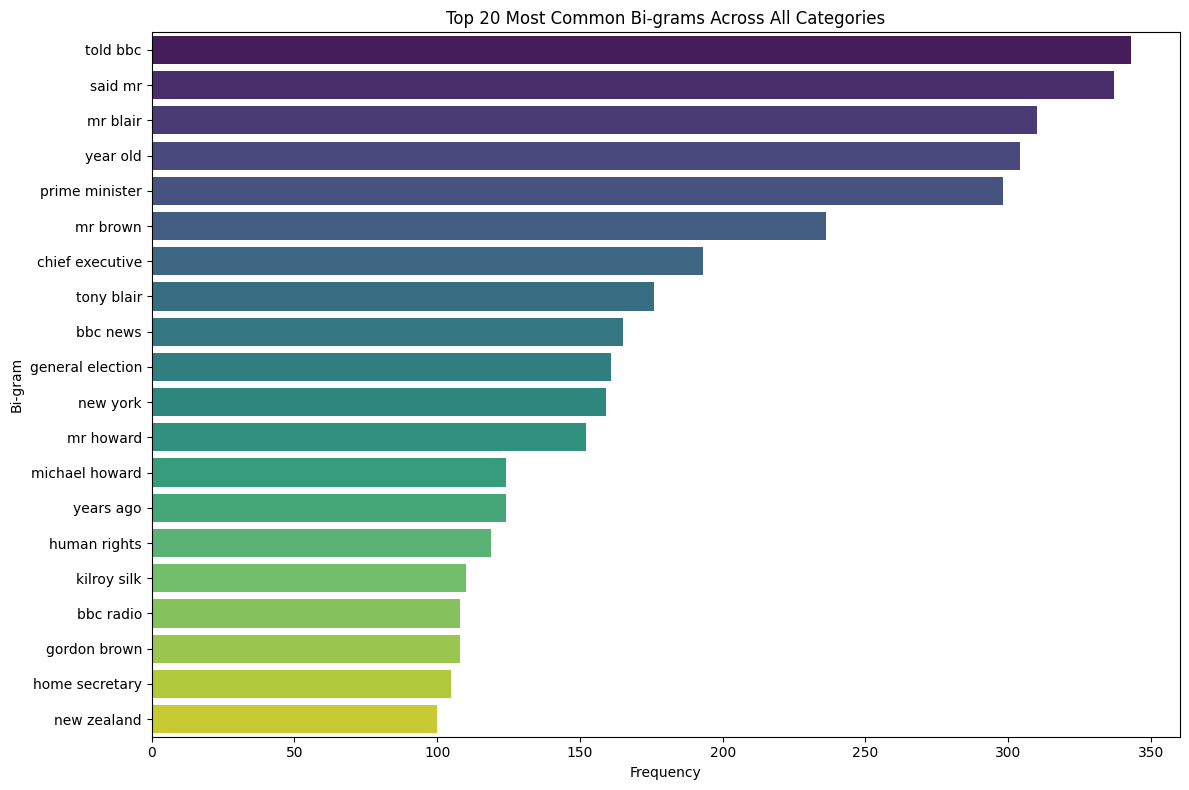

In [ ]:
# Chart - 11 visualization code

from sklearn.feature_extraction.text import CountVectorizer

# Combine all text data
all_text = " ".join(text for text in bbc_df['text'])

# Create a CountVectorizer for bi-grams, ignoring stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform([all_text])

# Get feature names (bi-grams)
feature_names = vectorizer.get_feature_names_out()

# Get the counts of each bi-gram
counts = X.sum(axis=0).A1

# Create a dictionary of bi-grams and their counts
ngram_counts = dict(zip(feature_names, counts))

# Get the most common bi-grams
most_common_ngrams = Counter(ngram_counts).most_common(20) # Get top 20 bi-grams

# Create a DataFrame for visualization
most_common_ngrams_df = pd.DataFrame(most_common_ngrams, columns=['ngram', 'count'])

# Visualize the most common bi-grams
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='ngram', data=most_common_ngrams_df, palette='viridis')
plt.title('Top 20 Most Common Bi-grams Across All Categories')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

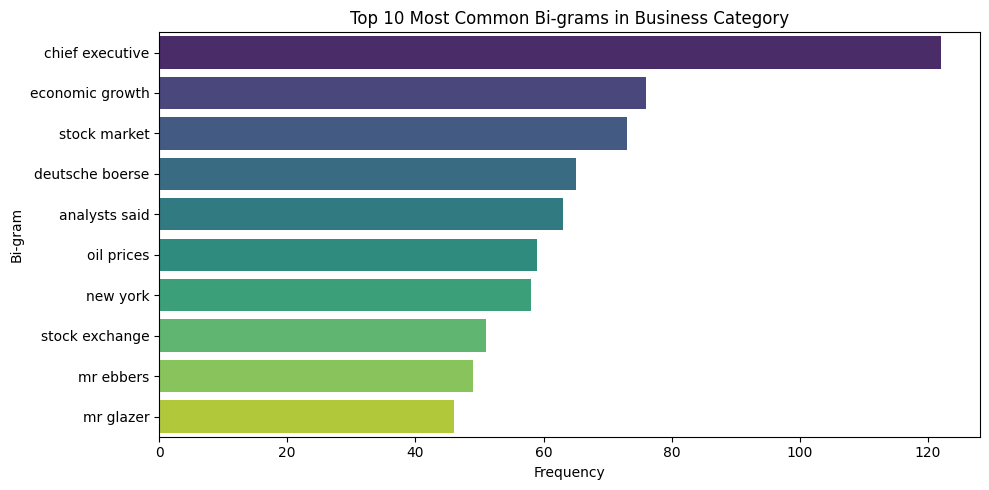

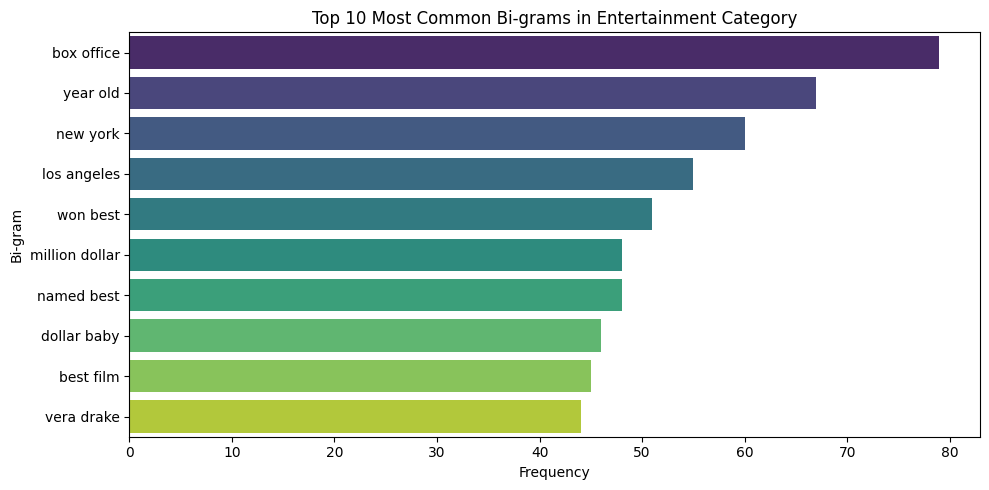

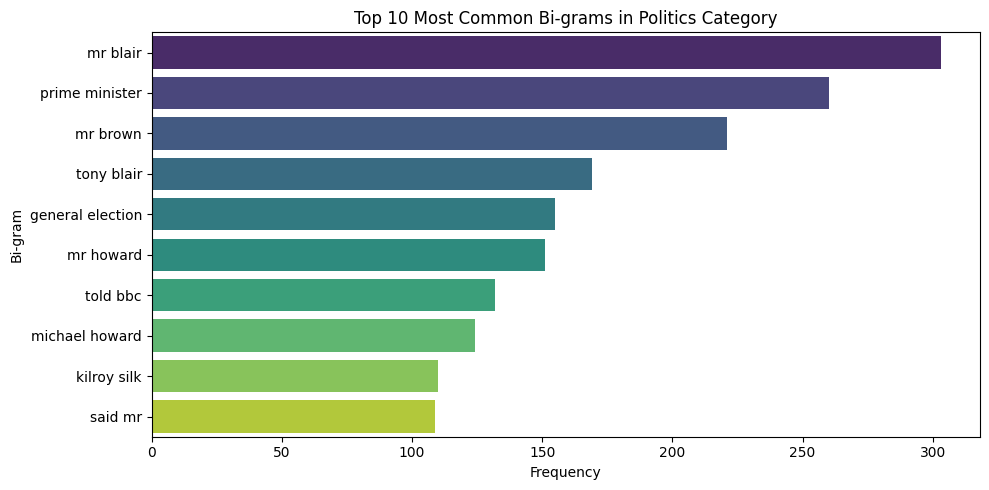

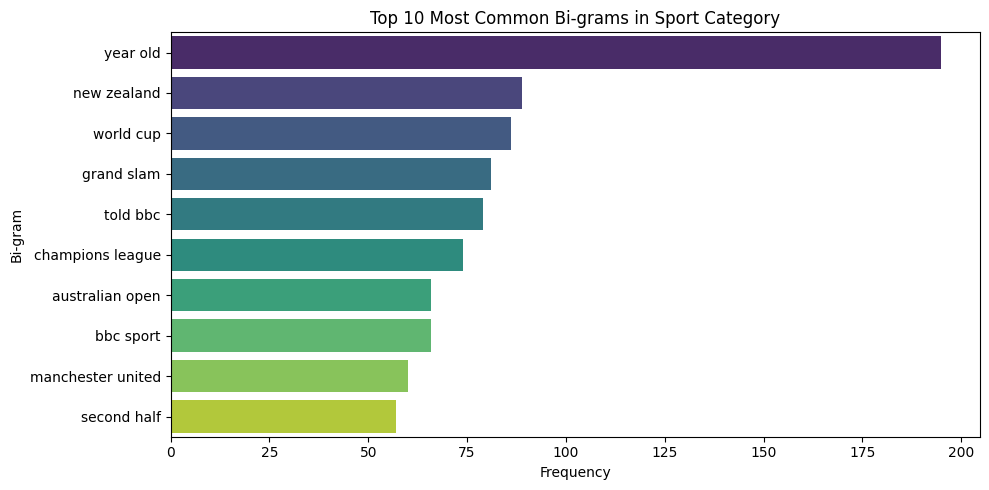

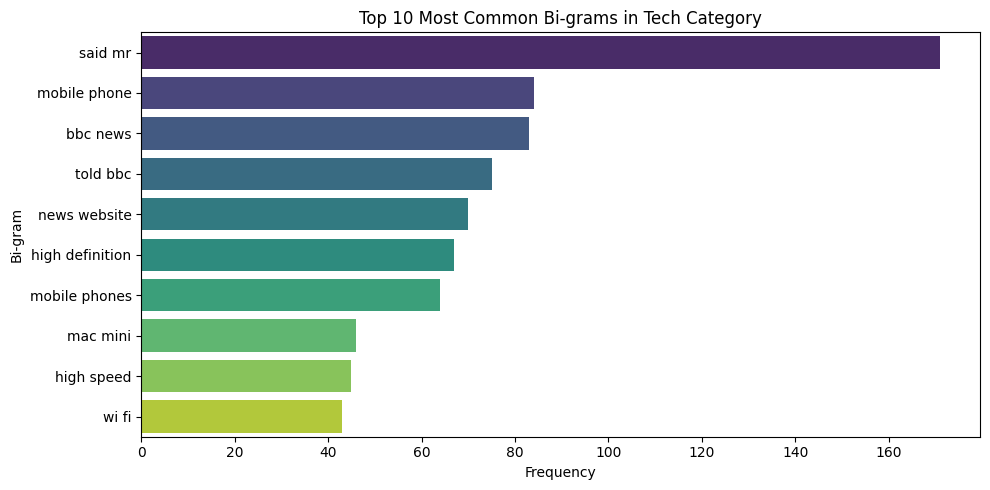

In [ ]:
# Chart - 12 visualization code

# Function to get most common n-grams for a category
def get_most_common_ngrams_by_category(category, dataframe, n=10, ngram_range=(2, 2)):
    # Filter dataframe by category
    category_text = " ".join(dataframe[dataframe['category'] == category]['text'])

    # Create a CountVectorizer for specified n-gram range, ignoring stopwords
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform([category_text])

    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Get the counts of each n-gram
    counts = X.sum(axis=0).A1

    # Create a dictionary of n-grams and their counts
    ngram_counts = dict(zip(feature_names, counts))

    # Get the most common n-grams
    most_common_ngrams = Counter(ngram_counts).most_common(n)
    return most_common_ngrams

# Get and display most common bi-grams for each category
for category in bbc_df['category'].unique():
    most_common = get_most_common_ngrams_by_category(category, bbc_df, n=10, ngram_range=(2, 2))
    most_common_ngrams_df = pd.DataFrame(most_common, columns=['ngram', 'count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='ngram', data=most_common_ngrams_df, palette='viridis')
    plt.title(f'Top 10 Most Common Bi-grams in {category.capitalize()} Category')
    plt.xlabel('Frequency')
    plt.ylabel('Bi-gram')
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

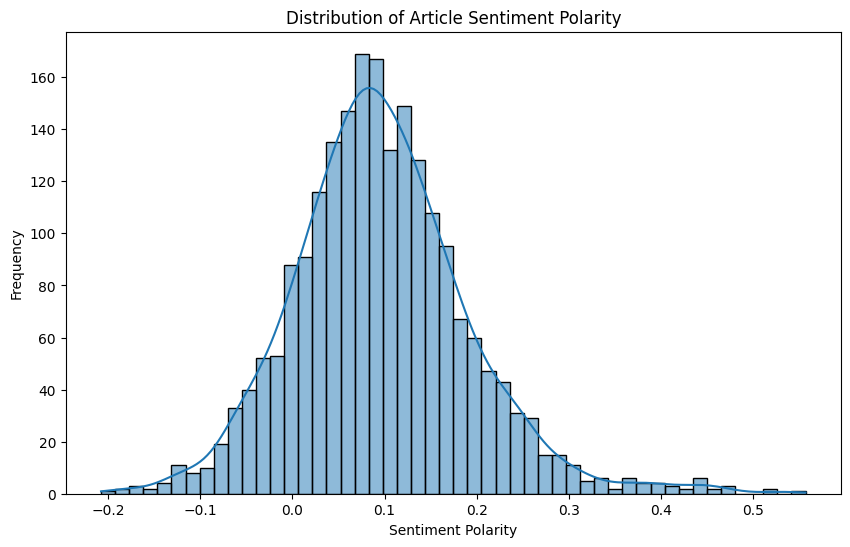

In [ ]:
# Chart - 13 visualization code

from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each article
bbc_df['sentiment_polarity'] = bbc_df['text'].apply(get_sentiment)

# Visualize the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(bbc_df['sentiment_polarity'], bins=50, kde=True)
plt.title('Distribution of Article Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

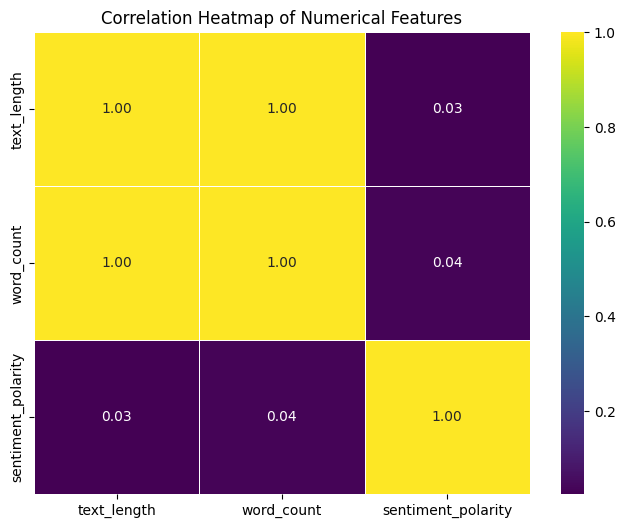

In [ ]:
# Correlation Heatmap visualization code

# Select numerical columns for correlation analysis
numerical_df = bbc_df[['text_length', 'word_count', 'sentiment_polarity']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

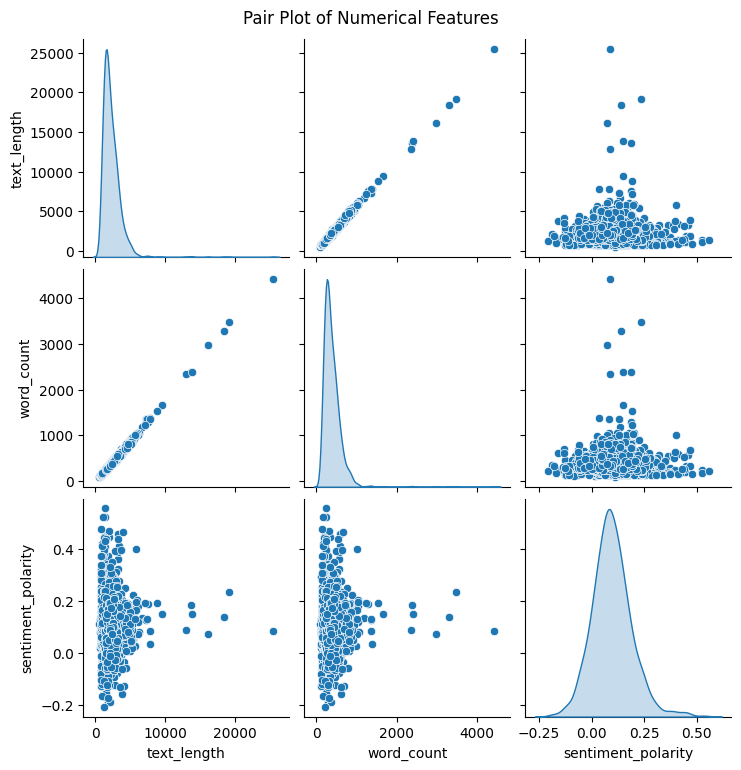

In [ ]:
# Pair Plot visualization code
sns.pairplot(numerical_df, diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

###  Textual Data Preprocessing

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

# Dictionary of common English contractions
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all had",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contractions_dict):
    """
    Expands contractions in a text string.

    Args:
        text (str): The input text string.
        contractions_dict (dict): A dictionary of contractions and their expansions.

    Returns:
        str: The text string with contractions expanded.
    """
    words = text.split()
    new_words = []
    for word in words:
        new_words.append(contractions_dict.get(word.lower(), word))
    return " ".join(new_words)

bbc_df['text'] = bbc_df['text'].apply(lambda x: expand_contractions(x, contractions_dict))

#### 2. Lower Casing

In [ ]:
# Lower Casing
bbc_df['text'] = bbc_df['text'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import re
bbc_df['text'] = bbc_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits


def remove_urls_and_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove words containing digits
    text = re.sub(r'\S*\d\S*', '', text)
    return text

bbc_df['text'] = bbc_df['text'].apply(remove_urls_and_digits)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

bbc_df['text'] = bbc_df['text'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Remove White spaces
bbc_df['text'] = bbc_df['text'].str.strip().str.replace('\s+', ' ', regex=True)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize


# Download the 'punkt' tokenizer if not already downloaded
try:
    word_tokenize("test")
except LookupError:
    nltk.download('punkt')

bbc_df['tokenized_text'] = bbc_df['text'].apply(word_tokenize)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger')


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the appropriate WordNet POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN,
                "V": wordnet.VERB,
                "A": wordnet.ADJ,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Apply lemmatization to the tokenized text
bbc_df['lemmatized_text'] = bbc_df['tokenized_text'].apply(lambda tokens: [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens])

# Join the lemmatized tokens back into a string
bbc_df['lemmatized_text_str'] = bbc_df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***